In [1]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset_sc/weather.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


불인덱싱
  - 하나의 열의 값을 기준으로 데이터를 선택

In [2]:
# 조건에 맞는 데이터 추출
w = df['temp'] >= 30
df[w]

,date,temp,max_wind,mean_wind
1103,2013-08-08,31.3,7.8,4.6
1104,2013-08-09,30.6,9.9,6.4
1105,2013-08-10,30.6,7.4,3.8
2913,2018-07-23,30.5,6.5,1.6
2925,2018-08-04,30.3,5.8,3.0


In [3]:
# 최고로 더웠던 날의 모든 정보 출력
w = df['temp'] == df['temp'].max()
df[w]

,date,temp,max_wind,mean_wind
1103,2013-08-08,31.3,7.8,4.6


In [4]:
# 기온이 30도 이상이고 최대 풍속이 9 이상인 데이터
w = (df['temp'] >= 30) & (df['max_wind'] >= 9)
df[w]

,date,temp,max_wind,mean_wind
1104,2013-08-09,30.6,9.9,6.4


결측데이터
  - 비어 있는 값

In [5]:
# 최대 풍속이 측정되지 않은 모든 데이터를 출력
df[df['max_wind'].isna()]

,date,temp,max_wind,mean_wind
559,2012-02-11,-0.7,NaN,NaN
560,2012-02-12,0.4,NaN,NaN
561,2012-02-13,4.0,NaN,NaN
3183,2019-04-19,7.8,NaN,2.3


In [6]:
# 결측치 데이터 갯수 확인 : 컬럼별 결측치 갯수 확인
df.isna().sum()

,0
date,0
temp,0
max_wind,4
mean_wind,6


결측데이터 삭제
  - 결측데이터를 다루는 방법
  - 함수 df.dropna(axis, how, thresh, subset, inplace)
    1. axis
      1-1. 축을 행 또는 열로 결정한다.
      1-2. 0 또는 'index'이면 누락된 값이 포함된 행을 삭제
      1-3. 1 또는 'column'이면 누락된 값이 포함된 열을 삭제
      1-4. 기본적으로 값은 0으로 설정
    2. how
      2-1. any는 null값이 있는 경우 행 또는 열을 삭제
      2-2. all은 모든 값이 누락된 경우 행 또는 열을 삭제
      2-3. 기본적으로 any로 설정
    3. inplace
      3-1. True로 설정하면 호출자 DataFrame을 변경하는 부울값이다.
      3-2. 기본적으로 Flase로 설정

In [7]:
# 결측치가 있는 행 삭제 후 확인
df2 = df.dropna()
df2.isna().sum()

,0
date,0
temp,0
max_wind,0
mean_wind,0


결측치 대체하기

In [8]:
# 결측치 : 평균값으로 대체
# df.fillna(df.mean(), inplace = True)  사용X
# df.fillna(df.mean(), inplace = True)  pandas 2.1.4부터 변경

# date 컬럼이 평균을 계산이 안되기 때문에

df.fillna(df.mean(numeric_only=True), inplace=True)
df2 = pd.DataFrame(df)
df2

,date,temp,max_wind,mean_wind
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6
...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7
3649,2020-07-28,21.9,4.5,1.6
3650,2020-07-29,21.6,3.2,1.0
3651,2020-07-30,22.9,9.7,2.4


In [9]:
# 또는
df3 = pd.DataFrame(df)
df3['date'] = pd.to_datetime(df3['date'])
df3

,date,temp,max_wind,mean_wind
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6
...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7
3649,2020-07-28,21.9,4.5,1.6
3650,2020-07-29,21.6,3.2,1.0
3651,2020-07-30,22.9,9.7,2.4


In [10]:
# 또는
# 평균 계산에 숫자데이터 컬럼만 포함
df4 = pd.DataFrame(df)
numeric_cols = df4.select_dtypes(include=['number']).columns
df4[numeric_cols] = df4[numeric_cols].fillna(df4[numeric_cols].mean())
df4

,date,temp,max_wind,mean_wind
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6
...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7
3649,2020-07-28,21.9,4.5,1.6
3650,2020-07-29,21.6,3.2,1.0
3651,2020-07-30,22.9,9.7,2.4


데이터 가공
  - csv : 컬럼명이나 데이터를 콤마(,)로 구분

In [11]:
# 엑셀 파일 불러오기
d = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset_sc/dust1.xlsx')
d.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 송파구,도시대기,111273,송파구,2021040101,0.004,1.0,0.002,0.066,50,18,서울 송파구 백제고분로 236
1,서울 송파구,도시대기,111273,송파구,2021040102,0.004,0.8,0.002,0.058,48,20,서울 송파구 백제고분로 236
2,서울 송파구,도시대기,111273,송파구,2021040103,0.004,0.8,0.002,0.055,44,20,서울 송파구 백제고분로 236
3,서울 송파구,도시대기,111273,송파구,2021040104,0.003,0.8,0.002,0.055,40,20,서울 송파구 백제고분로 236
4,서울 송파구,도시대기,111273,송파구,2021040105,0.004,0.8,0.002,0.053,38,17,서울 송파구 백제고분로 236


컬럼(변수) 삭제/ 생성
  - 데이터 분석에 필요없는 컬럼을 삭제하고 특정값으로 새로운 컬럼을 생성

In [12]:
# 컬럼삭제
d1 = d.drop(['지역', '망', '측정소코드'], axis=1)
d1.head()

,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,송파구,2021040101,0.004,1.0,0.002,0.066,50,18,서울 송파구 백제고분로 236
1,송파구,2021040102,0.004,0.8,0.002,0.058,48,20,서울 송파구 백제고분로 236
2,송파구,2021040103,0.004,0.8,0.002,0.055,44,20,서울 송파구 백제고분로 236
3,송파구,2021040104,0.003,0.8,0.002,0.055,40,20,서울 송파구 백제고분로 236
4,송파구,2021040105,0.004,0.8,0.002,0.053,38,17,서울 송파구 백제고분로 236


In [13]:
# 컬럼 생성
d1['city'] = '서울'
d1.head()

,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소,city
0,송파구,2021040101,0.004,1.0,0.002,0.066,50,18,서울 송파구 백제고분로 236,서울
1,송파구,2021040102,0.004,0.8,0.002,0.058,48,20,서울 송파구 백제고분로 236,서울
2,송파구,2021040103,0.004,0.8,0.002,0.055,44,20,서울 송파구 백제고분로 236,서울
3,송파구,2021040104,0.003,0.8,0.002,0.055,40,20,서울 송파구 백제고분로 236,서울
4,송파구,2021040105,0.004,0.8,0.002,0.053,38,17,서울 송파구 백제고분로 236,서울


컬럼 이름 변경
  - DataFrame.columns = ['new1', 'new2' ...]
    1. 전체 변수 이름 재설정
    2. 변수명을 차례로 재설정
  - DataFrame.rename(columns = {'기존이름':'새이름'}, inplace=True)
    1. 원하는 변수 이름만 수정
    2. 딕셔너리 구조로 정의

In [14]:
d1.rename(columns = {'측정소명':'name', '측정일시':'date', '주소':'addr'}, inplace=True)
d1.columns

Index(['name', 'date', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'addr',
       'city'],
      dtype='object')

데이터 형변환
  - 숫자형식은 문자 형식으로 변환

In [15]:
# 데이터형으로 확인
d1.dtypes

,0
name,object
date,int64
SO2,float64
CO,float64
O3,float64
NO2,float64
PM10,int64
PM25,int64
addr,object
city,object


In [16]:
# 숫자 int64형 -> 문자열형
d1['date'] = d1['date'].astype(str)
d1.dtypes

,0
name,object
date,object
SO2,float64
CO,float64
O3,float64
NO2,float64
PM10,int64
PM25,int64
addr,object
city,object


In [17]:
d1['date'] = d1['date'].str.slice(0,8)
d1.dtypes
d1['date']

,date
0,20210401
1,20210401
2,20210401
3,20210401
4,20210401
5,20210401
6,20210401
7,20210401
8,20210401
9,20210401


In [18]:
# 문자열형 -> 날짜형
d1['date'] = pd.to_datetime(d1['date'])
d1.dtypes

,0
name,object
date,datetime64[ns]
SO2,float64
CO,float64
O3,float64
NO2,float64
PM10,int64
PM25,int64
addr,object
city,object


In [19]:
# 날짜형식을 활용 : Series.dt.형식
d1['year'] = d1['date'].dt.year
d1['month'] = d1['date'].dt.month
d1['day'] = d1['date'].dt.day
d1.head()

,name,date,SO2,CO,O3,NO2,PM10,PM25,addr,city,year,month,day
0,송파구,2021-04-01,0.004,1.0,0.002,0.066,50,18,서울 송파구 백제고분로 236,서울,2021,4,1
1,송파구,2021-04-01,0.004,0.8,0.002,0.058,48,20,서울 송파구 백제고분로 236,서울,2021,4,1
2,송파구,2021-04-01,0.004,0.8,0.002,0.055,44,20,서울 송파구 백제고분로 236,서울,2021,4,1
3,송파구,2021-04-01,0.003,0.8,0.002,0.055,40,20,서울 송파구 백제고분로 236,서울,2021,4,1
4,송파구,2021-04-01,0.004,0.8,0.002,0.053,38,17,서울 송파구 백제고분로 236,서울,2021,4,1


데이터 병합
  - 함수형식
    1. pd.merge(left, right, how='inner', on=None)
    2. on = None : 아무런 옵션 적용X
    3. inner : 교집합
    4. outer : 어느 한쪽에도 없는 데이터가 있는 경우 NaN 지정
    5. left : 왼쪽 데이터프레임을 기준으로 각각의 key값에 해당하는 열 지정
    6. right : 오른쪽 데이터프레임을 기준으로 각각의 key값에 해당하는 열 지정

In [20]:
# 원본 데이터 확인
s1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset_sc/nation.xlsx')
s2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dataset_sc/code.xlsx')

s1

,국적코드,성별,입국객수,증가수
0,A01,남성,125000,8000
1,A01,여성,130000,10000
2,A05,남성,300,10
3,A05,여성,200,50
4,A06,남성,158912,24486
5,A06,여성,325000,63466


In [21]:
s2

,국적코드,국적명
0,A01,필리핀
1,A02,일본
2,A03,미국
3,A04,중국
4,A05,호주
5,A06,베트남
6,A07,스위스
7,A99,기타


In [22]:
# 공통 컬럼기준으로 병합
pd.merge(s1, s2, on = '국적코드')

,국적코드,성별,입국객수,증가수,국적명
0,A01,남성,125000,8000,필리핀
1,A01,여성,130000,10000,필리핀
2,A05,남성,300,10,호주
3,A05,여성,200,50,호주
4,A06,남성,158912,24486,베트남
5,A06,여성,325000,63466,베트남


데이터 그룹핑
  - 데이터를 특정한 값에 기반으로 묶는 기능
  - 통계량을 요약

In [23]:
# 한 열을 기준으로 그룹화
s1.groupby('국적코드').sum()

,성별,입국객수,증가수
국적코드,,,
A01,남성여성,255000,18000
A05,남성여성,500,60
A06,남성여성,483912,87952


In [24]:
# 여러 열을 기준으로 그룹화
s1.groupby(['국적코드', '성별']).sum()

입국객수    증가수
국적코드 성별               
A01  남성  125000   8000
     여성  130000  10000
A05  남성     300     10
     여성     200     50
A06  남성  158912  24486
     여성  325000  63466

pandas활용
  - 붓꽃(iris) 데이터 분석

In [25]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset_sc/iris.csv')
iris.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


데이터 전체 구조
  - 기본 정본 출력

In [26]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


데이터의 기초 통계량

In [27]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


품종별 데이터 갯수
  - value_counts()

In [29]:
cnt = pd.DataFrame(iris['Species'].value_counts())
cnt

,count
Species,
setosa,50
versicolor,50
virginica,50


데이터 전처리
  - 결측치 확인(결측값:True, 정상:False)

In [30]:
iris.isna()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [31]:
iris.isnull().sum()

,0
SepalLength,0
SepalWidth,0
PetalLength,0
PetalWidth,0
Species,0


데이터 전처리
  - 중복데이터 확인(중복 : True, 정상 : False)

In [32]:
iris.duplicated().sum()

np.int64(1)

실제 중복 데이터 확인

In [33]:
idx = iris.duplicated()
iris.loc[idx, :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
142,5.8,2.7,5.1,1.9,virginica


중복데이터 모두 확인
  - duplicated() 결과를  가지고 어떤 데이터 행끼리 중복되는지 확인

In [34]:
res = (iris['SepalLength'] == 5.8) & (iris['PetalWidth'] == 1.9)
iris.loc[res, :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


중복데이터 삭제
  - drop_duplicates() 로 나머지 중복 데이터 제거

In [35]:
iris = iris.drop_duplicates()
res = (iris['SepalLength'] == 5.8) & (iris['PetalWidth'] == 1.9)
iris.loc[res, :]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
101,5.8,2.7,5.1,1.9,virginica


In [36]:
cnt = pd.DataFrame(iris['Species'].value_counts())
cnt

,count
Species,
setosa,50
versicolor,50
virginica,49


데이터 그룹핑
  - '품종'을 열을 기준으로 합계

In [37]:
iris.groupby('Species').sum()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,323.6,146.0,272.5,99.4


In [38]:
# '품종'을 열을 기준으로 평균
iris.groupby('Species').mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


데이터 시각화
  - 판다스의 시리즈나 데이터 프레임은 'plot'이라는 시각화 메소드를 내장
    1. line : 선
    2. bar : 막대 -> 수직
    3. barth : 막대 -> 수평
    4. his : 히스토그램
    5. box : 박스
    6. kde : 커널밀도
    7. area : 면적
    8. pie : 파이
    9, scatter : 산점도
    10 hexbin : 고밀도 산점도

In [39]:
import matplotlib.pyplot as plt

iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48155 (\N{HANGUL SYLLABLE BAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52840 (\N{HANGUL SYLLABLE CIM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

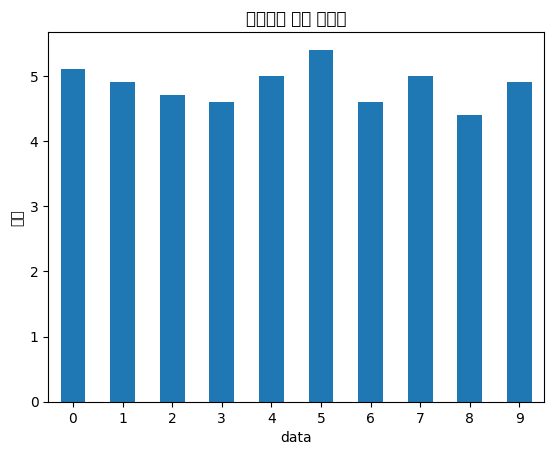

In [40]:
iris.SepalLength[:10].plot(kind='bar', rot=0)
plt.title('꽃받침의 길이 시각화')
plt.xlabel('data')
plt.ylabel('길이')
plt.show()